In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [ ]:
df = pd.read_csv('idealista.csv').iloc[:,1:]
pd.set_option('display.max_columns', None)
df.tail()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
9995,A3680294233477160420,201812,820000,5256.410256,HOME,SALE,156,4,3,1,1,1,3,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1968.0,1.0,1.0,1968,9,68,4.0,0,1,0,5.340062,0.480525,0.188384,-3.687160,40.462861,Madrid,HOME,SALE
9996,A14052961987227389669,201803,609000,4684.615385,HOME,SALE,130,2,2,0,1,1,3,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,NaN,1.0,1.0,1970,5,23,5.0,0,0,1,6.012991,0.556987,1.679254,-3.669311,40.463803,Madrid,HOME,SALE
9997,A251613575980724033,201812,131000,5954.545455,HOME,SALE,22,0,1,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1983.0,0.0,NaN,1983,8,22,5.0,0,0,1,1.015005,0.302523,1.780835,-3.713828,40.421564,Madrid,HOME,SALE
9998,A6650451879419491303,201812,352000,4400.000000,HOME,SALE,80,2,1,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,2.0,1969,7,18,4.0,0,0,1,2.224775,0.290774,0.917704,-3.701700,40.436512,Madrid,HOME,SALE
9999,A5399887992293725191,201812,716000,8731.707317,HOME,SALE,82,2,2,0,1,1,3,0,0,25001,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1.0,2.0,1981,6,20,0.0,0,0,1,1.355925,0.347713,0.180540,-3.689539,40.422126,Madrid,HOME,SALE


In [ ]:
df.shape

(10000, 46)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        10000 non-null  object 
 1   PERIOD                         10000 non-null  int64  
 2   PRICE                          10000 non-null  int64  
 3   UNITPRICE                      10000 non-null  float64
 4   ADTYPOLOGYID                   10000 non-null  object 
 5   ADOPERATIONID                  10000 non-null  object 
 6   CONSTRUCTEDAREA                10000 non-null  int64  
 7   ROOMNUMBER                     10000 non-null  int64  
 8   BATHNUMBER                     10000 non-null  int64  
 9   HASTERRACE                     10000 non-null  int64  
 10  HASLIFT                        10000 non-null  int64  
 11  HASAIRCONDITIONING             10000 non-null  int64  
 12  AMENITYID                      10000 non-null  

In [ ]:
cont_unique = df.nunique()
cont_unique

ASSETID                           9697
PERIOD                               4
PRICE                             1396
UNITPRICE                         7013
ADTYPOLOGYID                         1
ADOPERATIONID                        1
CONSTRUCTEDAREA                    381
ROOMNUMBER                          13
BATHNUMBER                          11
HASTERRACE                           2
HASLIFT                              2
HASAIRCONDITIONING                   2
AMENITYID                            3
HASPARKINGSPACE                      2
ISPARKINGSPACEINCLUDEDINPRICE        2
PARKINGSPACEPRICE                   62
HASNORTHORIENTATION                  2
HASSOUTHORIENTATION                  2
HASEASTORIENTATION                   2
HASWESTORIENTATION                   2
HASBOXROOM                           2
HASWARDROBE                          2
HASSWIMMINGPOOL                      2
HASDOORMAN                           2
HASGARDEN                            2
ISDUPLEX                 

In [ ]:
ls_cols_to_drop = cont_unique[cont_unique==1].index.tolist()
ls_cols_to_drop

['ADTYPOLOGYID', 'ADOPERATIONID', 'CITYNAME', 'ADTYPOLOGY', 'ADOPERATION']

In [ ]:
ls_cols_to_drop.append('ASSETID')
ls_cols_to_drop.append('BUILTTYPEID_3')
ls_cols_to_drop

['ADTYPOLOGYID',
 'ADOPERATIONID',
 'CITYNAME',
 'ADTYPOLOGY',
 'ADOPERATION',
 'ASSETID',
 'BUILTTYPEID_3']

In [ ]:
df.drop(ls_cols_to_drop, inplace=True, axis=1)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,PARKINGSPACEPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,CONSTRUCTIONYEAR,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,4050.000000,9571.000000,9333.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,201808.603100,3.928248e+05,3668.874240,100.592600,2.573100,1.574900,0.348300,0.696700,0.442600,2.924300,0.225000,0.225000,746.69400,0.103400,0.232100,0.201400,0.151500,0.259200,0.570300,0.152300,0.249000,0.188400,0.025900,0.026200,0.02250,1964.808889,2.709748,1.139612,1965.817900,6.34920,38.831600,4.854800,0.030400,0.189900,4.501380,0.485046,2.709000,-3.686254,40.420997
std,3.710249,4.085342e+05,1688.165288,65.305739,1.198666,0.824292,0.476455,0.459707,0.496719,0.311094,0.417603,0.417603,6341.06462,0.304496,0.422194,0.401066,0.358553,0.438217,0.495058,0.359329,0.432455,0.391051,0.158845,0.159738,0.14831,59.842062,2.254675,0.346603,28.879438,2.81113,51.595279,1.467696,0.171694,0.392241,2.700132,0.635598,2.232704,0.039528,0.033471
min,201803.000000,3.400000e+04,807.017544,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,19.000000,-1.000000,1.000000,1800.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.007647,0.004135,0.001435,-3.827889,40.332146
25%,201806.000000,1.600000e+05,2246.153846,61.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1955.000000,1.000000,1.000000,1955.000000,5.00000,12.000000,4.000000,0.000000,0.000000,2.409560,0.215112,1.046759,-3.708545,40.397126
50%,201809.000000,2.630000e+05,3500.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1968.000000,2.000000,1.000000,1967.000000,6.00000,21.000000,5.000000,0.000000,0.000000,4.114910,0.335277,2.003958,-3.693789,40.423135
75%,201812.000000,4.652500e+05,4760.000000,118.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1986.000000,4.000000,1.000000,1983.000000,8.00000,40.000000,6.000000,0.000000,0.000000,6.260617,0.529020,3.880130,-3.665524,40.441926
max,201812.000000,7.124000e+06,9967.741935,806.000000,20.000000,20.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,250001.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2291.000000,11.000000,2.000000,2018.000000,26.00000,724.000000,9.000000,1.000000,1.000000,14.088397,8.982250,12.500750,-3.541784,40.519596


In [ ]:
y = df.PRICE.values
y


array([127000, 291000, 198000, ..., 131000, 352000, 716000])

(array([6.763e+03, 2.068e+03, 6.760e+02, 2.010e+02, 1.260e+02, 7.400e+01,
        4.300e+01, 2.700e+01, 6.000e+00, 7.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00]),
 array([  34000.,  388500.,  743000., 1097500., 1452000., 1806500.,
        2161000., 2515500., 2870000., 3224500., 3579000., 3933500.,
        4288000., 4642500., 4997000., 5351500., 5706000., 6060500.,
        6415000., 6769500., 7124000.]),
 <BarContainer object of 20 artists>)

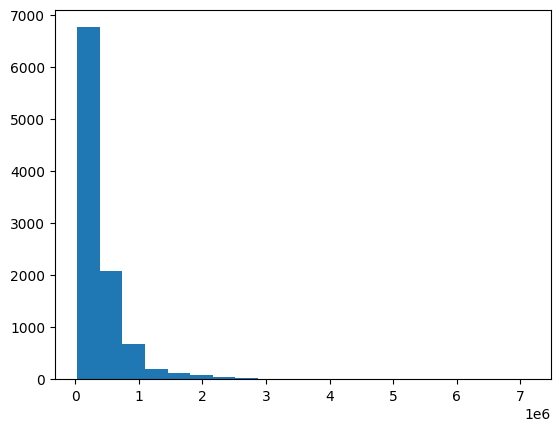

In [ ]:
plt.hist(y, bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x7887a434a740>,
 'caps': [<matplotlib.lines.Line2D at 0x7887a434ac80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7887a434a4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7887a434b1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7887a434b460>],
 'means': []}

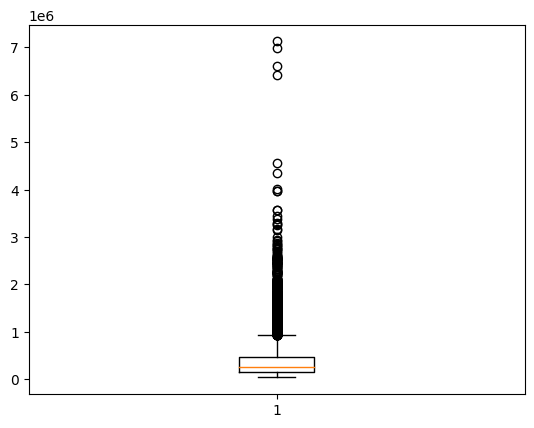

In [ ]:
plt.boxplot(y)

In [ ]:
df['LOG_PRICE'] = np.log(df.PRICE)

[]

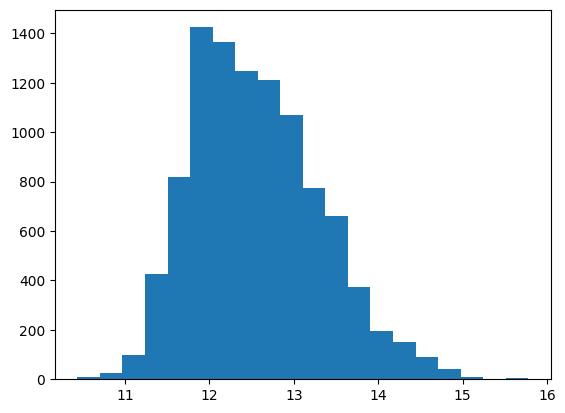

In [ ]:
plt.hist(df['LOG_PRICE'], bins=20)
plt.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7887a423ec20>,
 'caps': [<matplotlib.lines.Line2D at 0x7887a423fbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7887a423c550>],
 'medians': [<matplotlib.lines.Line2D at 0x7887a423e6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7887a423c2b0>],
 'means': []}

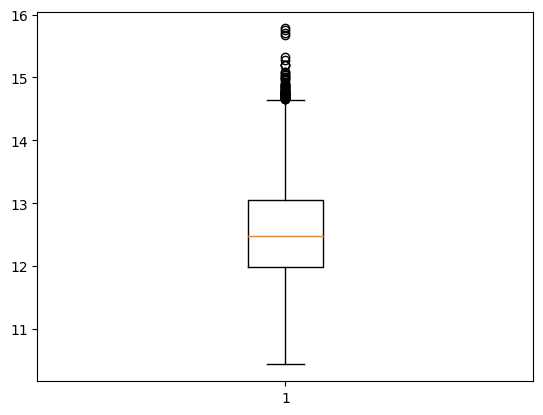

In [ ]:
plt.boxplot(df.LOG_PRICE)

In [ ]:
df.isna().mean()*100

PERIOD                            0.00
PRICE                             0.00
UNITPRICE                         0.00
CONSTRUCTEDAREA                   0.00
ROOMNUMBER                        0.00
BATHNUMBER                        0.00
HASTERRACE                        0.00
HASLIFT                           0.00
HASAIRCONDITIONING                0.00
AMENITYID                         0.00
HASPARKINGSPACE                   0.00
ISPARKINGSPACEINCLUDEDINPRICE     0.00
PARKINGSPACEPRICE                 0.00
HASNORTHORIENTATION               0.00
HASSOUTHORIENTATION               0.00
HASEASTORIENTATION                0.00
HASWESTORIENTATION                0.00
HASBOXROOM                        0.00
HASWARDROBE                       0.00
HASSWIMMINGPOOL                   0.00
HASDOORMAN                        0.00
HASGARDEN                         0.00
ISDUPLEX                          0.00
ISSTUDIO                          0.00
ISINTOPFLOOR                      0.00
CONSTRUCTIONYEAR         

In [ ]:
df.isnull().any(axis=1).sum()/len(df)*100

62.980000000000004

In [ ]:
df.drop(['CONSTRUCTIONYEAR'], inplace=True, axis=1)

In [ ]:
df.isnull().any(axis=1).sum()/len(df)*100

9.51

<Axes: >

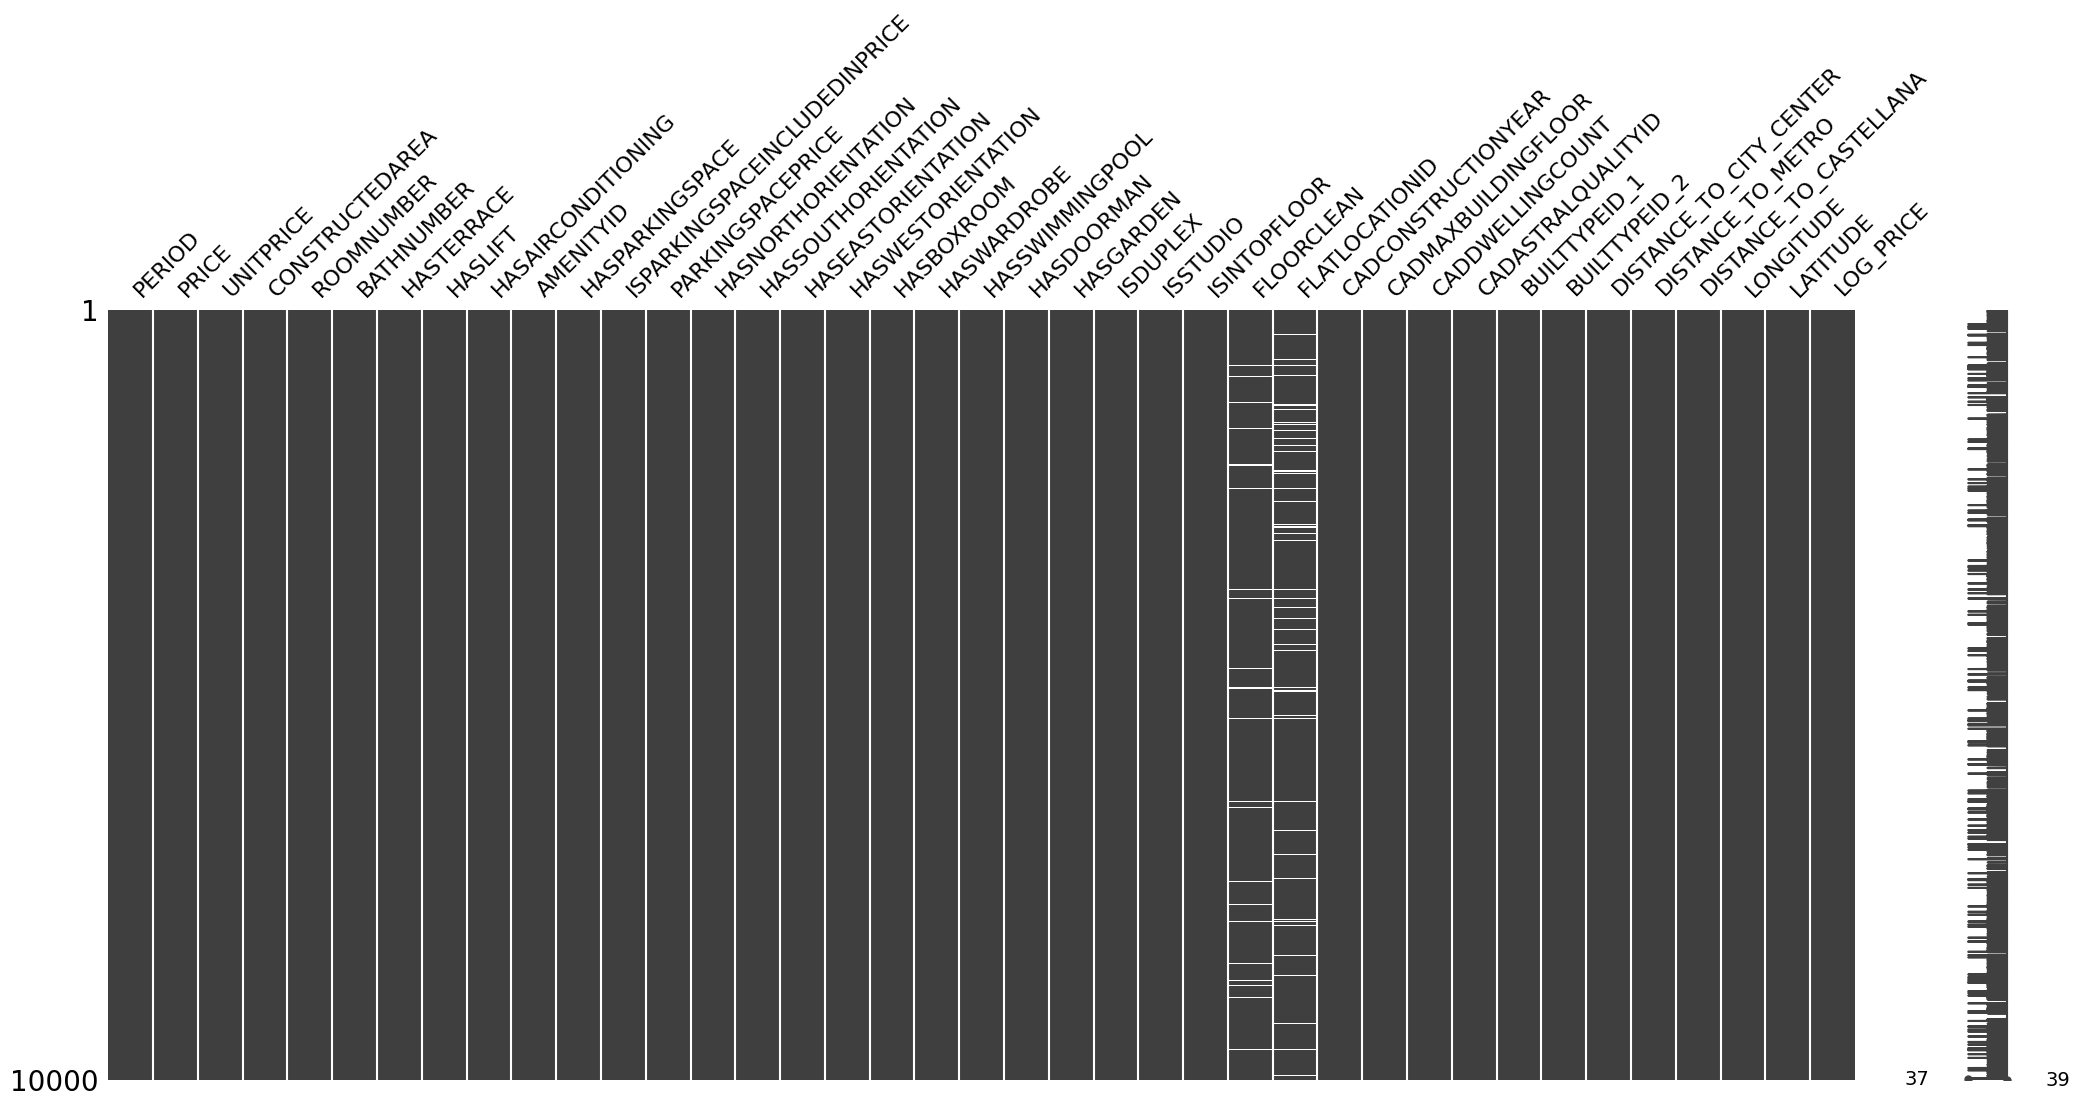

In [ ]:
msno.matrix(df)

In [ ]:
imp_knn = KNNImputer(n_neighbors=3)
df[['FLOORCLEAN','FLATLOCATIONID']] = imp_knn.fit_transform(df[['FLOORCLEAN','FLATLOCATIONID']])

In [ ]:
df.isna().sum()

PERIOD                           0
PRICE                            0
UNITPRICE                        0
CONSTRUCTEDAREA                  0
ROOMNUMBER                       0
BATHNUMBER                       0
HASTERRACE                       0
HASLIFT                          0
HASAIRCONDITIONING               0
AMENITYID                        0
HASPARKINGSPACE                  0
ISPARKINGSPACEINCLUDEDINPRICE    0
PARKINGSPACEPRICE                0
HASNORTHORIENTATION              0
HASSOUTHORIENTATION              0
HASEASTORIENTATION               0
HASWESTORIENTATION               0
HASBOXROOM                       0
HASWARDROBE                      0
HASSWIMMINGPOOL                  0
HASDOORMAN                       0
HASGARDEN                        0
ISDUPLEX                         0
ISSTUDIO                         0
ISINTOPFLOOR                     0
FLOORCLEAN                       0
FLATLOCATIONID                   0
CADCONSTRUCTIONYEAR              0
CADMAXBUILDINGFLOOR 

In [ ]:
X = df.drop(['PRICE','LOG_PRICE'], axis=1)
y = df['LOG_PRICE']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [ ]:
cook_distance = model.get_influence().cooks_distance[0]

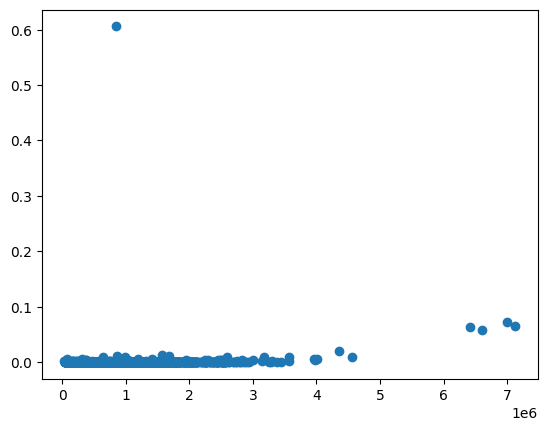

In [ ]:
plt.scatter(df.PRICE, cook_distance)
plt.show()

In [ ]:
np.where(cook_distance>0.5)

(array([8360]),)

In [ ]:
df.iloc[8360,]

PERIOD                           201806.000000
PRICE                            850000.000000
UNITPRICE                          1416.666667
CONSTRUCTEDAREA                     600.000000
ROOMNUMBER                           20.000000
BATHNUMBER                           20.000000
HASTERRACE                            0.000000
HASLIFT                               0.000000
HASAIRCONDITIONING                    1.000000
AMENITYID                             3.000000
HASPARKINGSPACE                       0.000000
ISPARKINGSPACEINCLUDEDINPRICE         0.000000
PARKINGSPACEPRICE                     1.000000
HASNORTHORIENTATION                   0.000000
HASSOUTHORIENTATION                   1.000000
HASEASTORIENTATION                    1.000000
HASWESTORIENTATION                    1.000000
HASBOXROOM                            0.000000
HASWARDROBE                           0.000000
HASSWIMMINGPOOL                       0.000000
HASDOORMAN                            0.000000
HASGARDEN    

In [ ]:
df.drop([8360], axis=0, inplace=True)

In [ ]:
df.apply(lambda x: x.skew())

PERIOD                           -0.501465
PRICE                             4.308368
UNITPRICE                         0.704216
CONSTRUCTEDAREA                   3.005433
ROOMNUMBER                        0.546524
BATHNUMBER                        1.886275
HASTERRACE                        0.636752
HASLIFT                          -0.856293
HASAIRCONDITIONING                0.231390
AMENITYID                        -4.441513
HASPARKINGSPACE                   1.317149
ISPARKINGSPACEINCLUDEDINPRICE     1.317149
PARKINGSPACEPRICE                16.733439
HASNORTHORIENTATION               2.605300
HASSOUTHORIENTATION               1.269850
HASEASTORIENTATION                1.489948
HASWESTORIENTATION                1.945232
HASBOXROOM                        1.099063
HASWARDROBE                      -0.284299
HASSWIMMINGPOOL                   1.935495
HASDOORMAN                        1.160891
HASGARDEN                         1.593816
ISDUPLEX                          5.970215
ISSTUDIO   

In [ ]:
binary_cols = df[(df==0)|(df==1)].dropna(axis=1).columns
binary_cols

Index(['HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'BUILTTYPEID_1',
       'BUILTTYPEID_2'],
      dtype='object')

In [ ]:
df_numerical= df.drop(binary_cols, axis=1)
df_numerical

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,AMENITYID,PARKINGSPACEPRICE,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,LOG_PRICE
0,201803,127000,1209.523810,105,3,2,3,1,1.0,1.000000,1999,10,48,5.0,4.385312,1.366987,2.003670,-3.672679,40.385117,11.751942
1,201803,291000,2910.000000,100,3,2,3,1,3.0,1.000000,2016,9,102,4.0,9.333559,0.098568,7.390903,-3.612396,40.369848,12.581079
2,201812,198000,1960.396040,101,4,2,3,1,2.0,1.000000,1976,11,163,5.0,8.738427,1.042879,7.237677,-3.610224,40.383652,12.196022
3,201806,626000,6019.230769,104,3,2,3,1,4.0,2.000000,1971,7,16,4.0,3.068749,0.122908,1.035725,-3.676414,40.434636,13.347106
4,201812,247000,2744.444444,90,4,2,3,1,1.0,1.000000,1997,6,151,4.0,7.404771,0.383724,6.200856,-3.620428,40.396706,12.417144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,201812,820000,5256.410256,156,4,3,3,1,1.0,1.000000,1968,9,68,4.0,5.340062,0.480525,0.188384,-3.687160,40.462861,13.617060
9996,201803,609000,4684.615385,130,2,2,3,1,1.0,1.000000,1970,5,23,5.0,6.012991,0.556987,1.679254,-3.669311,40.463803,13.319574
9997,201812,131000,5954.545455,22,0,1,3,1,0.0,1.333333,1983,8,22,5.0,1.015005,0.302523,1.780835,-3.713828,40.421564,11.782953
9998,201812,352000,4400.000000,80,2,1,3,1,2.0,2.000000,1969,7,18,4.0,2.224775,0.290774,0.917704,-3.701700,40.436512,12.771386


In [ ]:
# Función para calcular IQR y aplicar winsorización
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

In [ ]:
# Calcular el IQR y aplicar winsorización a cada columna
for column in df_numerical.columns:
    df_numerical[column] = winsorize_column(df_numerical[column], 0.25, 0.75)

In [ ]:
df_numerical.apply(lambda x: x.skew())

PERIOD                    -0.501465
PRICE                      1.088715
UNITPRICE                  0.629500
CONSTRUCTEDAREA            0.963171
ROOMNUMBER                -0.024206
BATHNUMBER                 1.044504
AMENITYID                  0.000000
PARKINGSPACEPRICE          0.000000
FLOORCLEAN                 0.905322
FLATLOCATIONID             0.000000
CADCONSTRUCTIONYEAR       -0.275990
CADMAXBUILDINGFLOOR        0.746713
CADDWELLINGCOUNT           1.081073
CADASTRALQUALITYID         0.050899
DISTANCE_TO_CITY_CENTER    0.584078
DISTANCE_TO_METRO          0.981094
DISTANCE_TO_CASTELLANA     0.998225
LONGITUDE                  0.256266
LATITUDE                   0.014066
LOG_PRICE                  0.457219
dtype: float64

In [ ]:
df_new = pd.concat([df_numerical, df[binary_cols]], axis=1)
df_new.head()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,AMENITYID,PARKINGSPACEPRICE,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,LOG_PRICE,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,BUILTTYPEID_1,BUILTTYPEID_2
0,201803,127000,1209.523810,105.0,3.0,2.0,3,1,1.0,1.0,1999,10.0,48,5.0,4.385312,0.999997,2.003670,-3.672679,40.385117,11.751942,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,201803,291000,2910.000000,100.0,3.0,2.0,3,1,3.0,1.0,2016,9.0,82,4.0,9.333559,0.098568,7.390903,-3.612396,40.369848,12.581079,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0
2,201812,198000,1960.396040,101.0,4.0,2.0,3,1,2.0,1.0,1976,11.0,82,5.0,8.738427,0.999997,7.237677,-3.610224,40.383652,12.196022,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,201806,626000,6019.230769,104.0,3.0,2.0,3,1,4.0,1.0,1971,7.0,16,4.0,3.068749,0.122908,1.035725,-3.676414,40.434636,13.347106,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,201812,247000,2744.444444,90.0,4.0,2.0,3,1,1.0,1.0,1997,6.0,82,4.0,7.404771,0.383724,6.200856,-3.620428,40.396706,12.417144,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.ensemble import IsolationForest
# Crea un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_new)

# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_new)

# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')


Observaciones predichas como atípicas: [   1    2    4 ... 9986 9987 9994]


In [ ]:
len(np.where(predictions==-1)[0])

3479

In [ ]:
df_new

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,AMENITYID,PARKINGSPACEPRICE,FLOORCLEAN,FLATLOCATIONID,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,LOG_PRICE,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,BUILTTYPEID_1,BUILTTYPEID_2
0,201803,127000,1209.523810,105.0,3.0,2.0,3,1,1.0,1.0,1999,10.0,48,5.0,4.385312,0.999997,2.003670,-3.672679,40.385117,11.751942,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,201803,291000,2910.000000,100.0,3.0,2.0,3,1,3.0,1.0,2016,9.0,82,4.0,9.333559,0.098568,7.390903,-3.612396,40.369848,12.581079,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0
2,201812,198000,1960.396040,101.0,4.0,2.0,3,1,2.0,1.0,1976,11.0,82,5.0,8.738427,0.999997,7.237677,-3.610224,40.383652,12.196022,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,201806,626000,6019.230769,104.0,3.0,2.0,3,1,4.0,1.0,1971,7.0,16,4.0,3.068749,0.122908,1.035725,-3.676414,40.434636,13.347106,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,201812,247000,2744.444444,90.0,4.0,2.0,3,1,1.0,1.0,1997,6.0,82,4.0,7.404771,0.383724,6.200856,-3.620428,40.396706,12.417144,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,201812,820000,5256.410256,156.0,4.0,3.0,3,1,1.0,1.0,1968,9.0,68,4.0,5.340062,0.480525,0.188384,-3.687160,40.462861,13.617060,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9996,201803,609000,4684.615385,130.0,2.0,2.0,3,1,1.0,1.0,1970,5.0,23,5.0,6.012991,0.556987,1.679254,-3.669311,40.463803,13.319574,0,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
9997,201812,131000,5954.545455,22.0,0.5,1.0,3,1,0.0,1.0,1983,8.0,22,5.0,1.015005,0.302523,1.780835,-3.713828,40.421564,11.782953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9998,201812,352000,4400.000000,80.0,2.0,1.0,3,1,2.0,1.0,1969,7.0,18,4.0,2.224775,0.290774,0.917704,-3.701700,40.436512,12.771386,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_new['CADCONSTRUCTIONYEAR']

0       1999
1       2016
2       1976
3       1971
4       1997
        ... 
9995    1968
9996    1970
9997    1983
9998    1969
9999    1981
Name: CADCONSTRUCTIONYEAR, Length: 9999, dtype: int64

In [ ]:
df_new['yrs_old'] = 2018-df_new['CADCONSTRUCTIONYEAR']

In [ ]:
df_new['yrs_old']

0       19
1        2
2       42
3       47
4       21
        ..
9995    50
9996    48
9997    35
9998    49
9999    37
Name: yrs_old, Length: 9999, dtype: int64

In [ ]:
fecha_ejemplo = '201803'

# Input: str
# Output: int [0-3]

def get_season(date):
  # Definir las listas de las estaciones
  ls_invierno = [12, 1, 2]
  ls_primavera = [3, 4, 5]
  ls_verano = [6, 7, 8]
  ls_otonyo = [9, 10, 11]
  # Coger los dos últimos caracteres de date y convertirlos a entero
  mes = int(str(date)[-2:])
  # Ver si el mes se encuentra en alguna de las listas
  if mes in ls_invierno: return 0
  elif mes in ls_primavera: return 1
  elif mes in ls_verano: return 2
  elif mes in ls_otonyo: return 3

get_season(fecha_ejemplo)

1

In [ ]:
df_new['ad_season'] = df_new.PERIOD.apply(get_season)

In [ ]:
df_new['ad_season']

0       1
1       1
2       0
3       2
4       0
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: ad_season, Length: 9999, dtype: int64

In [ ]:
df_new['ROOMNUMBER']

0       3.0
1       3.0
2       4.0
3       3.0
4       4.0
       ... 
9995    4.0
9996    2.0
9997    0.5
9998    2.0
9999    2.0
Name: ROOMNUMBER, Length: 9999, dtype: float64

In [ ]:
def categorize_size(room_number):
  if room_number<=2:
    return 0
  elif 2<room_number<=4:
    return 1
  else:
    return 2

In [ ]:
df_new['size'] = df_new.ROOMNUMBER.apply(categorize_size)

In [ ]:
df_new['size']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: size, Length: 9999, dtype: int64

In [ ]:
df_corr = df_new.corr()
#df_corr.style.background_gradient(cmap='coolwarm').format(precision=3)

In [ ]:
df_corr.isna().sum()

PERIOD                            3
PRICE                             3
UNITPRICE                         3
CONSTRUCTEDAREA                   3
ROOMNUMBER                        3
BATHNUMBER                        3
AMENITYID                        42
PARKINGSPACEPRICE                42
FLOORCLEAN                        3
FLATLOCATIONID                   42
CADCONSTRUCTIONYEAR               3
CADMAXBUILDINGFLOOR               3
CADDWELLINGCOUNT                  3
CADASTRALQUALITYID                3
DISTANCE_TO_CITY_CENTER           3
DISTANCE_TO_METRO                 3
DISTANCE_TO_CASTELLANA            3
LONGITUDE                         3
LATITUDE                          3
LOG_PRICE                         3
HASTERRACE                        3
HASLIFT                           3
HASAIRCONDITIONING                3
HASPARKINGSPACE                   3
ISPARKINGSPACEINCLUDEDINPRICE     3
HASNORTHORIENTATION               3
HASSOUTHORIENTATION               3
HASEASTORIENTATION          

In [ ]:
print(df_new['AMENITYID'].value_counts())
print(df_new['PARKINGSPACEPRICE'].value_counts())
print(df_new['FLATLOCATIONID'].value_counts())

3    9999
Name: AMENITYID, dtype: int64
1    9999
Name: PARKINGSPACEPRICE, dtype: int64
1.0    9999
Name: FLATLOCATIONID, dtype: int64


In [ ]:
df_new.drop(['AMENITYID','PARKINGSPACEPRICE','FLATLOCATIONID'], axis=1, inplace=True)

In [ ]:
df_corr = df_new.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,FLOORCLEAN,CADCONSTRUCTIONYEAR,CADMAXBUILDINGFLOOR,CADDWELLINGCOUNT,CADASTRALQUALITYID,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,LOG_PRICE,HASTERRACE,HASLIFT,HASAIRCONDITIONING,HASPARKINGSPACE,ISPARKINGSPACEINCLUDEDINPRICE,HASNORTHORIENTATION,HASSOUTHORIENTATION,HASEASTORIENTATION,HASWESTORIENTATION,HASBOXROOM,HASWARDROBE,HASSWIMMINGPOOL,HASDOORMAN,HASGARDEN,ISDUPLEX,ISSTUDIO,ISINTOPFLOOR,BUILTTYPEID_1,BUILTTYPEID_2,yrs_old,ad_season,size
PERIOD,1.000,0.029,0.070,-0.010,-0.029,0.011,0.012,-0.001,0.021,0.008,0.003,-0.003,-0.011,-0.021,0.005,0.032,0.043,0.009,0.027,0.046,-0.002,-0.002,0.005,0.016,0.025,0.015,0.003,0.002,0.026,0.013,0.026,-0.001,-0.002,0.006,0.026,0.009,0.001,-0.431,-0.029
PRICE,0.029,1.000,0.659,0.837,0.481,0.742,0.231,-0.054,0.264,0.102,-0.536,-0.254,-0.126,-0.345,-0.042,0.370,0.960,0.071,0.437,0.165,0.268,0.268,0.041,0.091,0.068,0.107,0.249,0.215,0.184,0.410,0.136,0.045,-0.097,0.046,0.027,0.050,0.054,-0.062,0.435
UNITPRICE,0.070,0.659,1.000,0.202,-0.083,0.286,0.149,-0.235,0.178,0.052,-0.492,-0.465,-0.294,-0.519,-0.068,0.381,0.713,-0.121,0.354,0.193,0.066,0.066,0.016,0.043,0.048,0.051,0.042,0.183,0.052,0.274,-0.017,0.002,0.064,0.042,-0.001,-0.048,0.235,-0.048,-0.070
CONSTRUCTEDAREA,-0.010,0.837,0.202,1.000,0.706,0.807,0.212,0.109,0.245,0.123,-0.394,-0.009,0.049,-0.092,0.003,0.210,0.794,0.194,0.360,0.100,0.326,0.326,0.041,0.094,0.061,0.111,0.319,0.179,0.211,0.355,0.206,0.072,-0.155,0.032,0.052,0.086,-0.109,-0.054,0.643
ROOMNUMBER,-0.029,0.481,-0.083,0.706,1.000,0.585,0.174,0.053,0.182,0.057,-0.111,0.082,0.055,0.044,0.005,0.038,0.444,0.218,0.156,-0.049,0.158,0.158,0.040,0.061,0.044,0.083,0.163,0.049,0.044,0.185,0.105,0.001,-0.322,-0.004,-0.005,0.186,-0.053,-0.017,0.886
BATHNUMBER,0.011,0.742,0.286,0.807,0.585,1.000,0.167,0.147,0.238,0.169,-0.395,0.019,0.065,-0.070,0.034,0.203,0.716,0.144,0.368,0.130,0.368,0.368,0.037,0.068,0.050,0.092,0.321,0.203,0.268,0.337,0.242,0.095,-0.108,0.011,0.099,0.003,-0.147,-0.056,0.522
FLOORCLEAN,0.012,0.231,0.149,0.212,0.174,0.167,1.000,0.094,0.364,0.223,-0.154,0.034,0.015,-0.028,0.042,0.056,0.243,0.184,0.247,0.131,0.124,0.124,0.044,0.048,0.042,0.061,0.095,0.122,0.094,0.187,0.093,-0.013,-0.073,0.153,0.017,0.004,-0.094,-0.018,0.156
CADCONSTRUCTIONYEAR,-0.001,-0.054,-0.235,0.109,0.053,0.147,0.094,1.000,0.099,0.351,-0.074,0.563,0.415,0.434,0.198,0.028,-0.038,0.195,0.207,0.113,0.422,0.422,0.022,0.004,0.007,0.007,0.322,0.128,0.443,0.102,0.394,0.034,-0.009,0.003,0.174,-0.155,-1.000,-0.015,0.047
CADMAXBUILDINGFLOOR,0.021,0.264,0.178,0.245,0.182,0.238,0.364,0.099,1.000,0.540,-0.275,0.030,0.014,-0.090,0.091,0.130,0.299,0.071,0.407,0.048,0.145,0.145,0.040,0.027,0.043,0.045,0.090,0.141,0.142,0.293,0.179,-0.060,-0.031,-0.019,0.034,0.035,-0.099,-0.020,0.166
CADDWELLINGCOUNT,0.008,0.102,0.052,0.123,0.057,0.169,0.223,0.351,0.540,1.000,-0.352,0.288,0.217,0.178,0.204,0.081,0.150,0.055,0.353,0.103,0.343,0.343,0.027,0.013,0.020,0.043,0.200,0.162,0.411,0.263,0.373,-0.028,-0.025,-0.020,0.081,-0.069,-0.351,0.000,0.043


In [ ]:
df_corr[df_corr.LOG_PRICE.abs()<0.1].index

Index(['PERIOD', 'CADCONSTRUCTIONYEAR', 'LONGITUDE', 'HASTERRACE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'BUILTTYPEID_1',
       'BUILTTYPEID_2', 'yrs_old', 'ad_season'],
      dtype='object')

In [ ]:
df_corr[df_corr.LOG_PRICE.abs()>0.4].index

Index(['PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
       'CADASTRALQUALITYID', 'LATITUDE', 'LOG_PRICE', 'HASLIFT', 'HASDOORMAN',
       'size'],
      dtype='object')

In [ ]:
# Calcular los VIF
vif = pd.Series([variance_inflation_factor(df_corr.values, i) for i in range(df_corr.shape[1])], index=df_new.columns)

vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


PERIOD                              2.412448
PRICE                            4259.128770
UNITPRICE                        1603.500533
CONSTRUCTEDAREA                  4291.449950
ROOMNUMBER                        279.101559
BATHNUMBER                         75.806680
FLOORCLEAN                          3.424401
CADCONSTRUCTIONYEAR                      inf
CADMAXBUILDINGFLOOR                10.460987
CADDWELLINGCOUNT                   16.534998
CADASTRALQUALITYID                 14.066999
DISTANCE_TO_CITY_CENTER           229.001216
DISTANCE_TO_METRO                   7.158044
DISTANCE_TO_CASTELLANA             88.795362
LONGITUDE                           4.274074
LATITUDE                           33.271969
LOG_PRICE                        6386.733823
HASTERRACE                          2.411460
HASLIFT                            19.176781
HASAIRCONDITIONING                  3.380071
HASPARKINGSPACE                          inf
ISPARKINGSPACEINCLUDEDINPRICE            inf
HASNORTHOR

In [ ]:
df_new.drop(['CADCONSTRUCTIONYEAR', 'ISPARKINGSPACEINCLUDEDINPRICE'], axis=1, inplace=True)

In [ ]:
X = df_new.drop(['LOG_PRICE', 'PRICE', 'UNITPRICE'], axis=1)
y = df_new['LOG_PRICE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.feature_importances_

array([0.00291473, 0.2737922 , 0.00310461, 0.07703982, 0.00949054,
       0.00287194, 0.00287062, 0.05816134, 0.01702592, 0.00325869,
       0.03043767, 0.01072003, 0.04890378, 0.00219753, 0.27711925,
       0.02127108, 0.03183272, 0.00264255, 0.00186478, 0.00219229,
       0.00219274, 0.0029531 , 0.01129388, 0.05466031, 0.00814926,
       0.00601159, 0.00338699, 0.00768122, 0.00303815, 0.00476365,
       0.01069796, 0.0033633 , 0.00209569, 0.        ], dtype=float32)

In [ ]:
feature_names = X.columns

In [ ]:
feature_names

Index(['PERIOD', 'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER', 'FLOORCLEAN',
       'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT', 'CADASTRALQUALITYID',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'HASTERRACE',
       'HASLIFT', 'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
       'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL',
       'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'BUILTTYPEID_1', 'BUILTTYPEID_2', 'yrs_old', 'ad_season', 'size'],
      dtype='object')

In [ ]:
d_imp = dict(zip(feature_names,  model.feature_importances_))
d_imp

{'PERIOD': 0.0029147333,
 'CONSTRUCTEDAREA': 0.2737922,
 'ROOMNUMBER': 0.0031046076,
 'BATHNUMBER': 0.077039815,
 'FLOORCLEAN': 0.009490538,
 'CADMAXBUILDINGFLOOR': 0.002871936,
 'CADDWELLINGCOUNT': 0.0028706228,
 'CADASTRALQUALITYID': 0.05816134,
 'DISTANCE_TO_CITY_CENTER': 0.017025921,
 'DISTANCE_TO_METRO': 0.0032586893,
 'DISTANCE_TO_CASTELLANA': 0.03043767,
 'LONGITUDE': 0.010720033,
 'LATITUDE': 0.048903782,
 'HASTERRACE': 0.0021975301,
 'HASLIFT': 0.27711925,
 'HASAIRCONDITIONING': 0.021271076,
 'HASPARKINGSPACE': 0.031832717,
 'HASNORTHORIENTATION': 0.0026425547,
 'HASSOUTHORIENTATION': 0.0018647764,
 'HASEASTORIENTATION': 0.0021922926,
 'HASWESTORIENTATION': 0.0021927445,
 'HASBOXROOM': 0.0029531033,
 'HASWARDROBE': 0.011293881,
 'HASSWIMMINGPOOL': 0.054660313,
 'HASDOORMAN': 0.0081492625,
 'HASGARDEN': 0.006011594,
 'ISDUPLEX': 0.0033869937,
 'ISSTUDIO': 0.00768122,
 'ISINTOPFLOOR': 0.0030381496,
 'BUILTTYPEID_1': 0.0047636484,
 'BUILTTYPEID_2': 0.010697958,
 'yrs_old': 0.0033

In [ ]:
for k, v in dict(sorted(d_imp.items(), key=lambda x:x[1], reverse = True)).items():
  print(k, v)

HASLIFT 0.27711925
CONSTRUCTEDAREA 0.2737922
BATHNUMBER 0.077039815
CADASTRALQUALITYID 0.05816134
HASSWIMMINGPOOL 0.054660313
LATITUDE 0.048903782
HASPARKINGSPACE 0.031832717
DISTANCE_TO_CASTELLANA 0.03043767
HASAIRCONDITIONING 0.021271076
DISTANCE_TO_CITY_CENTER 0.017025921
HASWARDROBE 0.011293881
LONGITUDE 0.010720033
BUILTTYPEID_2 0.010697958
FLOORCLEAN 0.009490538
HASDOORMAN 0.0081492625
ISSTUDIO 0.00768122
HASGARDEN 0.006011594
BUILTTYPEID_1 0.0047636484
ISDUPLEX 0.0033869937
yrs_old 0.0033632976
DISTANCE_TO_METRO 0.0032586893
ROOMNUMBER 0.0031046076
ISINTOPFLOOR 0.0030381496
HASBOXROOM 0.0029531033
PERIOD 0.0029147333
CADMAXBUILDINGFLOOR 0.002871936
CADDWELLINGCOUNT 0.0028706228
HASNORTHORIENTATION 0.0026425547
HASTERRACE 0.0021975301
HASWESTORIENTATION 0.0021927445
HASEASTORIENTATION 0.0021922926
ad_season 0.002095686
HASSOUTHORIENTATION 0.0018647764
size 0.0


In [ ]:
# Input: d_imp, corr_mat, imp_cut, corr_cut
# Output: ls_vars_to_drop
def get_vars_to_delete(d_imp, corr_mat, imp_cut=0.01, corr_cut=0.1):
  # Inicializo una lista vacía que contendrá las columnas a eliminar
  ls_res = []
  # Identifico aquellas variables cuya correlación en absoluto con la variable LOG_PRICE es menor a corr_cut
  low_corr_vars = corr_mat[corr_mat.LOG_PRICE.abs()<corr_cut].index
  # Para cada una de esas variables
  for var_name in low_corr_vars:
    # Compruebo si su impotarcia es menor a imp_cut
    if d_imp[var_name]<imp_cut:
      # De ser así guardo el nombre de la variable
      ls_res.append(var_name)
  # Retorno la lista
  return ls_res

In [ ]:
X_copy = X_train.copy()
X_copy['LOG_PRICE'] = y_train.values

vars_to_delete =  get_vars_to_delete(d_imp, X_copy.corr())
vars_to_delete

['PERIOD',
 'HASTERRACE',
 'HASNORTHORIENTATION',
 'HASSOUTHORIENTATION',
 'HASEASTORIENTATION',
 'ISDUPLEX',
 'ISSTUDIO',
 'ISINTOPFLOOR',
 'BUILTTYPEID_1',
 'yrs_old',
 'ad_season']

In [ ]:
len(vars_to_delete)/X_train.shape[1]

0.3235294117647059

In [ ]:
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)